# Machine Learning Project : Titanic. 

## Load Dataset.

In [1]:
#Impor semua packages yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Impor data
df_train = pd.read_csv(r"C:\Users\Ravialdy\Downloads\Certificate utk jadi data scientist\train.csv")
df_test = pd.read_csv(r"C:\Users\Ravialdy\Downloads\Certificate utk jadi data scientist\test.csv")

## Analisis awal.

In [3]:
#Insight awal mengenai data tersebut
print(df_train.head(3))
print(df_test.head(3))
print(df_train.shape)
print(df_test.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [4]:
#Deskripsi data tersebut()
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [5]:
#Deskripsi data tersebut(1)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
#Cek missing values
print("Missing values pada df_train : ")
print(df_train.isna().sum())
print("Missing values pada df_test : ")
print(df_test.isna().sum())

Missing values pada df_train : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values pada df_test : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data Cleaning.

In [7]:
#Data cleaning
print(df_train["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
#Data cleaning(1)
df_train["Age"].fillna(df_train["Age"].median(), inplace = True)
df_test["Age"].fillna(df_test["Age"].median(), inplace = True)
df_train["Embarked"].fillna('S', inplace = True)

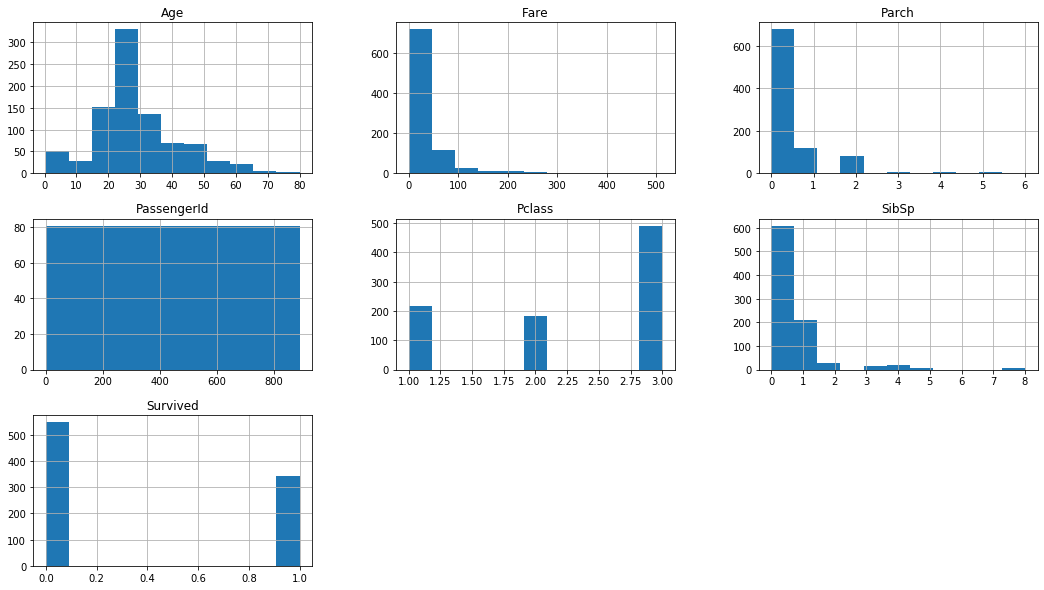

In [9]:
df_train.hist(bins = 11, figsize = (18,10))
plt.show()

## Exploratory Data Analysis.

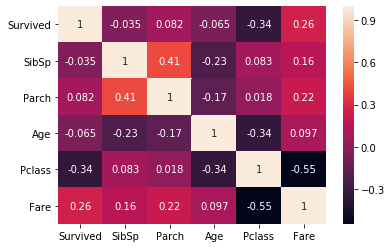

In [10]:
#Matrik korelasi
korelasi = df_train[["Survived", "SibSp", "Parch", "Age", "Pclass", "Fare"]].corr()
sns.heatmap(korelasi, annot = True)
plt.show()

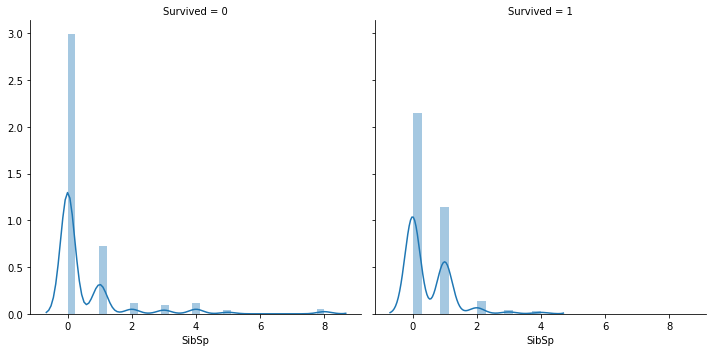

In [11]:
#Korelasi SibSp dengan Survived
sibsp_survived = sns.FacetGrid(df_train, col = "Survived", height = 5)
sibsp_survived.map(sns.distplot, "SibSp")
plt.show()

C:\Users\Ravialdy\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


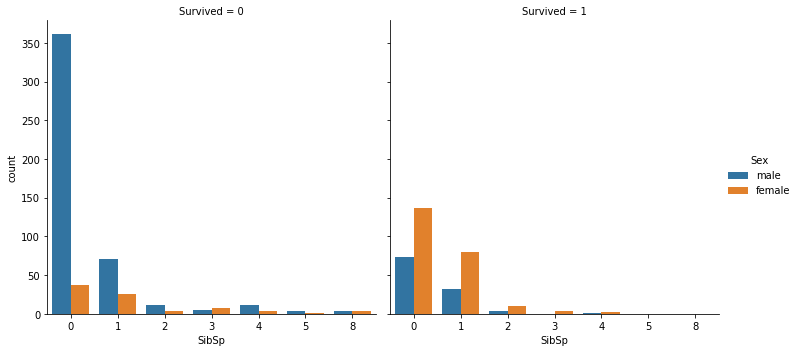

In [12]:
#Korelasi SibSp dengan Survived(1)
sns.factorplot(x = "SibSp", col = "Survived", data = df_train, hue = "Sex", kind = "count")
plt.show()

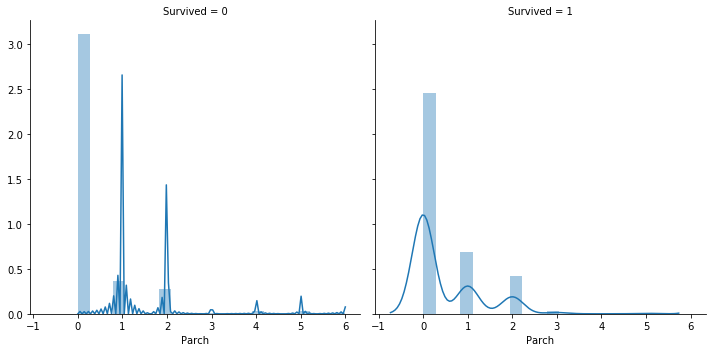

In [13]:
#Korelasi Parch dengan Survived
parch_survived = sns.FacetGrid(df_train, col = "Survived", height = 5)
parch_survived.map(sns.distplot, "Parch")
plt.show()

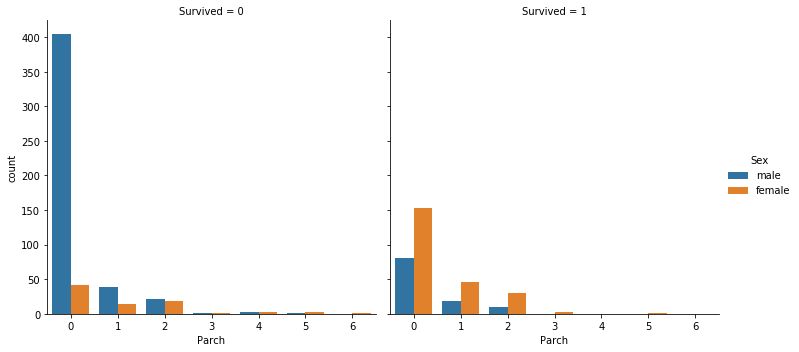

In [14]:
#Korelasi Parch dengan Survived(1)
sns.factorplot(x = "Parch", col = "Survived", data = df_train, hue = "Sex", kind = "count")
plt.show()

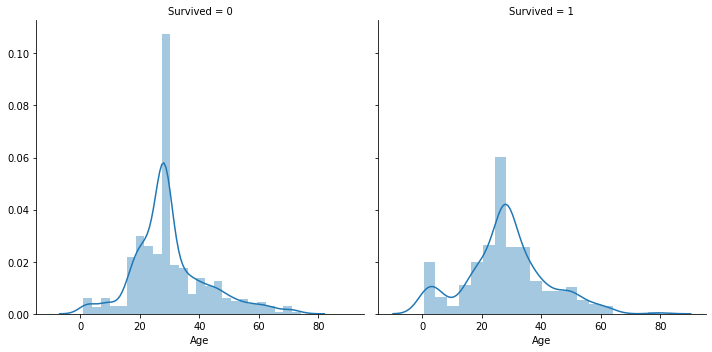

In [15]:
#Korelasi Age dengan Survived
age_survived = sns.FacetGrid(df_train, col = "Survived", height = 5)
age_survived.map(sns.distplot, "Age")
plt.show()

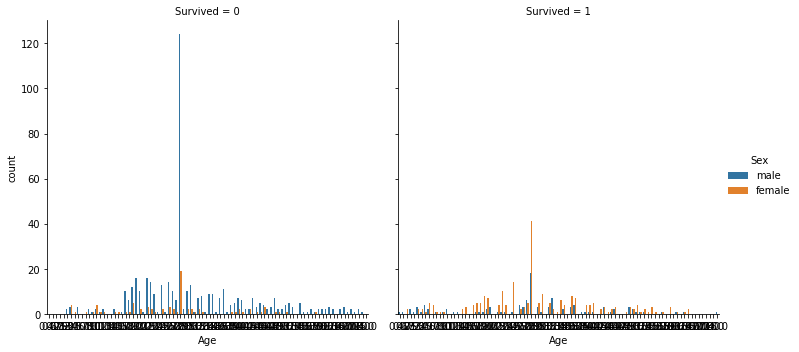

In [16]:
#Korelasi Age dengan Survived(1)
sns.factorplot(x = "Age", col = "Survived", data = df_train, hue = "Sex", kind = "count")
plt.show()

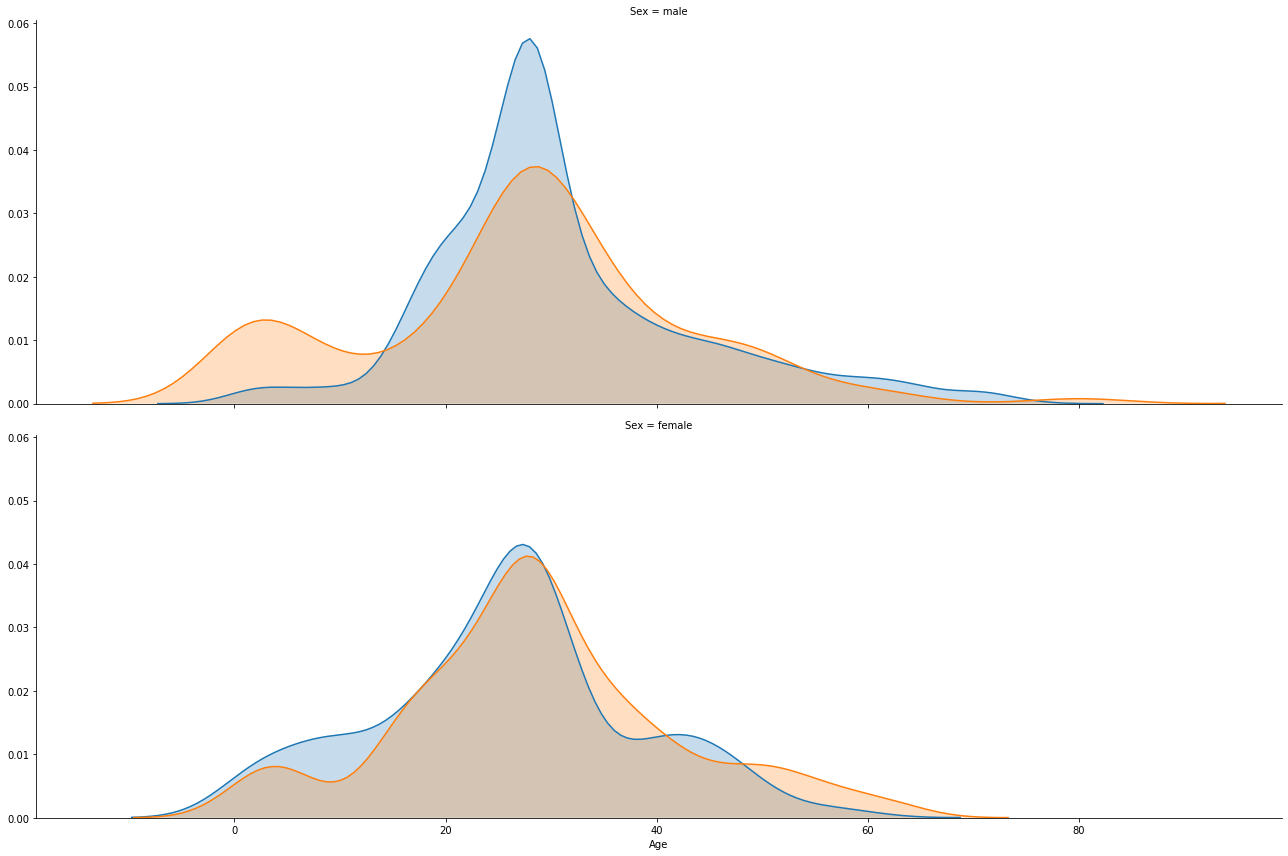

In [17]:
#Korelasi Age, Survived, dan Sex
age_survived_sex = sns.FacetGrid(df_train, hue = "Survived", row = "Sex", aspect = 3, height = 6)
age_survived_sex.map(sns.kdeplot, "Age", shade = True)
age_survived.set(xlim = (0, df_train["Age"].max()))
age_survived.add_legend()
plt.show()

In [18]:
##Korelasi Age, Survived, dan Sex(1)
print("1. Berapa sih jumlah laki2 dan perempuan yang meninggal jika usia > 50 : ")
print(df_train[(df_train["Age"] > 50) & (df_train["Survived"] == 0)].Sex.value_counts())
print("2. Berapa sih jumlah laki2 dan perempuan yang tetap hidup jika usia > 50 : ")
print(df_train[(df_train["Age"] > 50) & (df_train["Survived"] == 1)].Sex.value_counts())

1. Berapa sih jumlah laki2 dan perempuan yang meninggal jika usia > 50 : 
male      41
female     1
Name: Sex, dtype: int64
2. Berapa sih jumlah laki2 dan perempuan yang tetap hidup jika usia > 50 : 
female    16
male       6
Name: Sex, dtype: int64


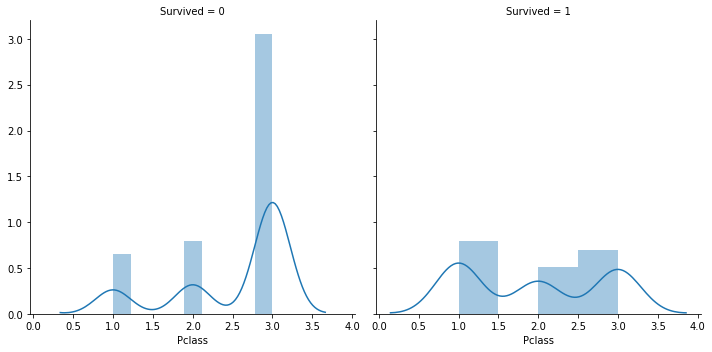

In [19]:
#Korelasi PClass dengan Survived
pclass_survived = sns.FacetGrid(df_train, col = "Survived", height = 5)
pclass_survived.map(sns.distplot, "Pclass")
plt.show()

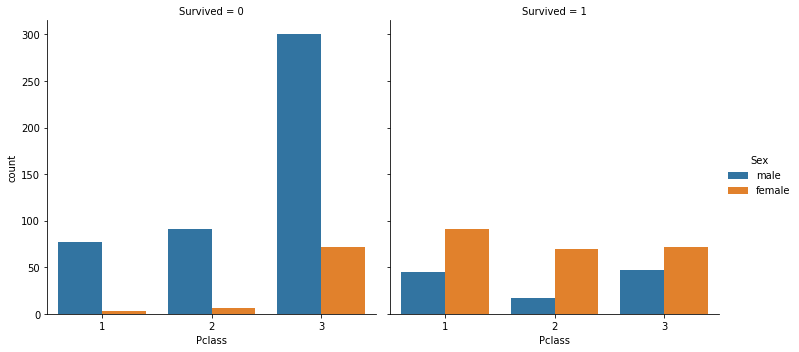

In [20]:
#Korelasi PClass dengan Survived(1)
sns.factorplot(x = "Pclass", col = "Survived", data = df_train, hue = "Sex", kind = "count")
plt.show()

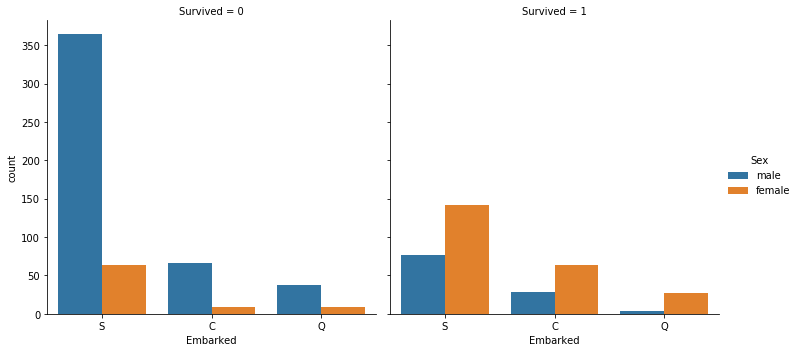

In [21]:
#Korelasi Embarked dengan Survived
sns.factorplot(x = "Embarked", col = "Survived", data = df_train, hue = "Sex", kind = "count")
plt.show()

## Feature Engineering.

In [22]:
#Feature Engineering(1)
print("Cek struktur df_train : ")
print(df_train.head())
print("Cek struktur df_test : ")
print(df_test.head())

Cek struktur df_train : 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [23]:
#Feature Engineering(2)
#Mengganti fitur Name dengan fitur yang baru dengan tipe data numerik
data_utuh = [df_train, df_test]  #Gabungan dataset training dengan testing

for data in data_utuh:
    data["Gelar"] = data["Name"].str.extract("([A-Za-z]+)\.", expand = False)

In [24]:
df_train["Gelar"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Ms            1
Capt          1
Countess      1
Mme           1
Don           1
Sir           1
Jonkheer      1
Name: Gelar, dtype: int64

In [25]:
df_test["Gelar"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Gelar, dtype: int64

In [26]:
#Jadikan ke 4 kategori saja dengan tipe data numerik
gelar_ = {
    "Mr" : 0, "Miss" : 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3
         }
for data in data_utuh:
    data["Gelar"] = data["Gelar"].map(gelar_)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gelar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gelar
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


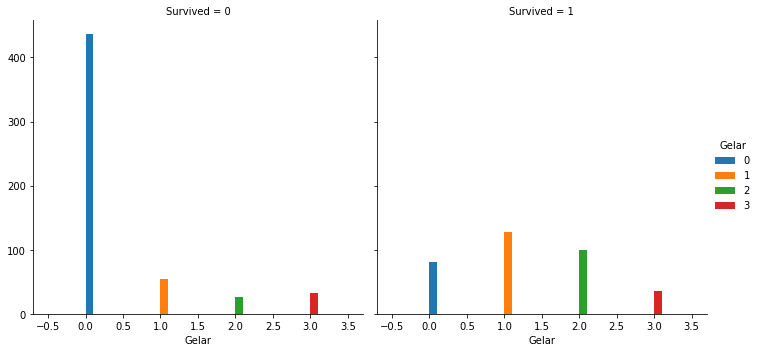

In [29]:
chart_gelar = sns.FacetGrid(df_train, col = "Survived", hue = "Gelar", height = 5)
chart_gelar.map(plt.hist, "Gelar")
chart_gelar.add_legend()
plt.show()

In [30]:
#Feature Engineering(3)
#Ubah elemen2 pada kolom Sex

sex_ = {"male": 0, "female": 1}
for data in data_utuh:
    data["Sex"] = data["Sex"].map(sex_)

In [31]:
#Jangan lupa untuk menghapu fitur yang tidak penting (Contoh : fitur Name)
df_train.drop("Name", axis = 1, inplace = True)
df_test.drop("Name", axis = 1, inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gelar
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [32]:
#Cek apakah ada missing values di fitur Fare
print("Jumlah missing value pada fitur Fare (training data)", df_train["Fare"].isna().sum())
print("Jumlah missing value pada fitur Fare (testing data)", df_test["Fare"].isna().sum())

Jumlah missing value pada fitur Fare (training data) 0
Jumlah missing value pada fitur Fare (testing data) 1


In [33]:
#Isi missing value pada fitur Fare dengan nilai median yg berkorespodensi dengan Pclass
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gelar
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [34]:
#Ganti elemen2 pada fitur Embarked dengan elemen yang memiliki tipe data numerik
embarked_ = {"S" : 0, "C" : 1, "Q" : 2}

for data in data_utuh:
    data["Embarked"] = data["Embarked"].map(embarked_)

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gelar
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


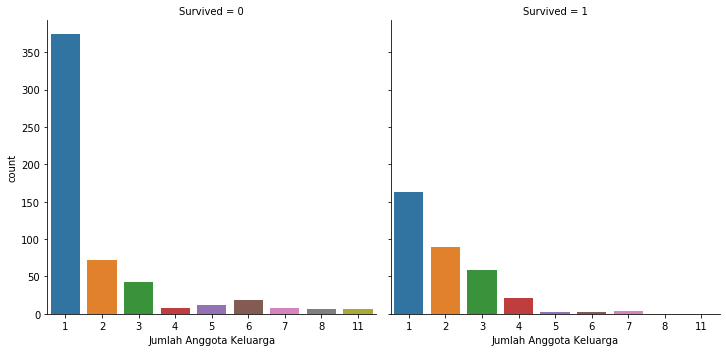

In [36]:
#Buat fitur baru yang sekiranya informatif, yakni Family Size
df_train["Jumlah Anggota Keluarga"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["Jumlah Anggota Keluarga"] = df_test["SibSp"] + df_test["Parch"] + 1

sns.factorplot(x = "Jumlah Anggota Keluarga", col = "Survived", data = df_train, kind = "count")
plt.show()

In [37]:
#Hapus kolom atau fitur yang kita anggap tidak penting
#Hapus fitur Cabin karena terlalu banyak missing values
#Hapus juga fitur Ticket & PassengerId karena tidak informatif
#Hapus pula fitur SibSp & Parch karena keduanya telah terwakili oleh fitur Family Size

df_train.drop(labels = ["Cabin", "PassengerId", "Ticket", "SibSp", "Parch"], axis = 1, inplace = True)
df_test.drop(labels = ["Cabin", "Ticket", "SibSp", "Parch"], axis = 1, inplace = True)

## Model Machine Learning. 

In [38]:
#Model Building
#Import semua modul classifier yang ingin digunakan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [39]:
#Split data menjadi variabel target (y) dan variabel predictor (X)
X_train = df_train.drop("Survived", axis = 1)
X_test = df_test.drop("PassengerId", axis = 1).copy()
y_train = df_train["Survived"]
print(X_train.shape, X_test.shape, y_train.shape)

(891, 7) (418, 7) (891,)


In [40]:
#K-fold sebagai metode cross validation
metode_kfold = KFold(n_splits = 10, random_state = 42)

In [41]:
#KNN
k = np.sqrt(891)
print("nilain k yang dapat dipakai adalah", k)

nilain k yang dapat dipakai adalah 29.8496231131986


In [42]:
#KNN(1)
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_akurasi = knn.score(X_train, y_train)
print(knn_akurasi)

0.7418630751964085


In [43]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_akurasi = decision_tree.score(X_train, y_train)
print(decision_tree_akurasi)

0.9820426487093153


In [44]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_akurasi = svc.score(X_train, y_train)
print(svc_akurasi)

C:\Users\Ravialdy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9180695847362514


In [45]:
#Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_akurasi = random_forest.score(X_train, y_train)
print(random_forest_akurasi)

0.9708193041526375


C:\Users\Ravialdy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
#Ada Boost
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
ada_boost_akurasi = ada_boost.score(X_train, y_train)
print(ada_boost_akurasi)

0.8395061728395061


In [47]:
#Gaussian Naive Bayes
gaussnb = GaussianNB()
gaussnb.fit(X_train, y_train)
y_pred = gaussnb.predict(X_test)
gaussnb_akurasi = gaussnb.score(X_train, y_train)
print(gaussnb_akurasi)

0.8159371492704826


In [48]:
modelML = pd.DataFrame({
    "Model" : ["KNN", "Decision Tree", "Support Vector Machines", "Random Forest", "Ada Boost", "Gaussian Naive Bayes"],
    "Akurasi" : [knn_akurasi, decision_tree_akurasi,svc_akurasi, random_forest_akurasi, ada_boost_akurasi, gaussnb_akurasi]
})
modelML.sort_values(by = "Akurasi", ascending = False)

,Model,Akurasi
1,Decision Tree,0.982043
3,Random Forest,0.970819
2,Support Vector Machines,0.918070
4,Ada Boost,0.839506
5,Gaussian Naive Bayes,0.815937
0,KNN,0.741863


## Testing. 

In [49]:
#Testing
modelML_kita = DecisionTreeClassifier()    #Pilih yang terbaik(akurasi tertinggi)
modelML_kita.fit(X_train, y_train)
y_pred = modelML_kita.predict(X_test)

In [50]:
#Testing(1)
submission = pd.DataFrame({
    "PassengerId" : df_test["PassengerId"],
    "Survived" : y_pred
})
submission.to_csv(r"C:\Users\Ravialdy\Pictures\Essay1\tulisan medium\submission.csv", index = False)

In [51]:
submission = pd.read_csv(r"C:\Users\Ravialdy\Pictures\Essay1\tulisan medium\submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
